<a href="https://colab.research.google.com/github/KIMCAT33/openCV/blob/master/opencv_tutorial_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

width =600, height=384, depth=3


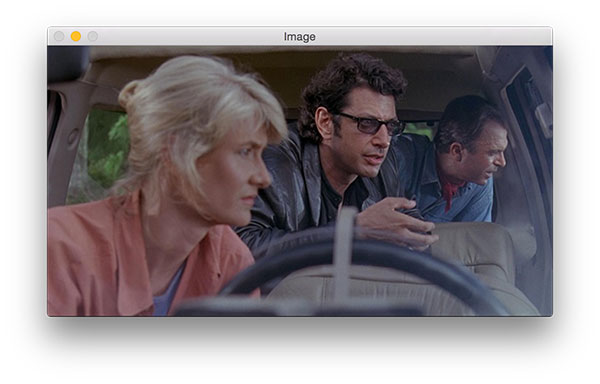

-1

In [4]:
import imutils
import cv2
from google.colab.patches import cv2_imshow # colab에서 cv2.imshow하면 crash발생

#이미지 불러오기
image = cv2.imread("opencv_tutorial_load_image.jpg")
(h, w, d) = image.shape
print("width ={}, height={}, depth={}".format(w,h,d))

#이미지 출력
cv2_imshow(image)



# 픽셀이란 무엇인가?
이미지는 격자의 픽셀로 구성됩니다. 640 x 480 이미지에는 640 개의 열 (폭)과 480 개의 행 (높이)이 있습니다. 해당 치수의 이미지에는 640 * 480 = 307200 픽셀이 있습니다.

회색조 이미지의 각 픽셀에는 회색 음영을 나타내는 값이 있습니다. OpenCV에는 0에서 255까지 256 개의 회색 음영이 있습니다. 따라서 회색조 이미지에는 각 픽셀과 관련된 회색조 값이 있습니다.

컬러 이미지의 픽셀에는 추가 정보가 있습니다. 이미지 처리에 대해 배우면서 곧 익숙해 질 몇 가지 색상 공간이 있습니다. 편의상 RGB 색 공간 만 고려해 봅시다.

RGB (Red, Green, Blue) 색상 공간의 OpenCV 색상 이미지에는 각 픽셀과 관련된 3 개의 튜플이 있습니다 : (B, G, R).

순서는 RGB가 아니라 BGR입니다. OpenCV가 몇 년 전에 처음 개발되었을 때 표준은 BGR 순 이었기 때문입니다. 수년에 걸쳐 표준은 이제 RGB가되었지만 OpenCV는 여전히 기존의 코드가 깨지지 않도록이 BGR 순서를 유지합니다.

# 배열 슬라이싱 및 자르기
"관심 영역"(ROI:regions of interest)을 추출하는 것은 이미지 처리에 중요한 기술입니다.

예를 들어 영화에서 얼굴을 인식하는 작업을하고 있다고 가정합니다. 먼저 얼굴 감지 알고리즘을 실행하여 작업중인 모든 프레임에서 얼굴의 좌표를 찾습니다. 그런 다음 얼굴의 ROI를 추출하여 저장하거나 처리하려고합니다. 쥬라기공원의 이안 말콤 박사의 얼굴을 포함하는 모든 프레임을 찾는 것은 훌륭한 얼굴 인식 미니 프로젝트입니다.

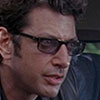

-1

In [8]:
roi = image[80:180, 320:420]
cv2_imshow(roi)


이안 말콤 박사의 얼굴을 추출했습니다. 이 예제에서는 실제로 Photoshop을 사용하여 (x, y) 좌표를 미리 정했지만 자동으로 얼굴 ROI를 감지하고 추출 할 수 있습니다. 관심있다면 [블로그](https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/)를 참고하시기 바랍니다.

# 이미지 크기 조정
여러 가지 이유로 이미지 크기를 조정하는 것이 중요합니다. 먼저, 화면에 맞게 큰 이미지의 크기를 조정할 수 있습니다. 크기 조정을 하면 처리 할 픽셀 수가 적기 때문에  이미지 처리 속도가 더 빠릅니다. 딥 러닝의 경우 가로 세로 비율을 무시하고 이미지의 크기를 조정하여 이미지가 정사각형이고 특정 차원이어야하는 네트워크의 크기에 맞도록 만들기도 합니다.

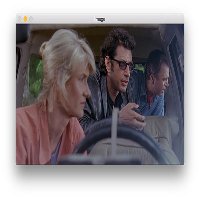

In [9]:
resized = cv2.resize(image, (200, 200))
cv2_imshow(resized)

종횡비를 무시하고 이미지 크기를 조정했습니다. 이미지의 크기가 조정되었지만 가로 세로 비율을 고려하지 않아서 왜곡 된 모습을 보여줍니다.

원본 이미지의 가로 세로 비율을 계산하고 이미지 크기를 조정하여 이미지가 찌그러지고 왜곡되지 않도록 해보겠습니다.

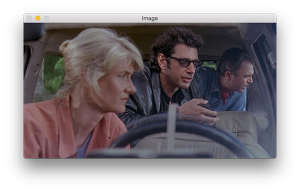

In [10]:
r = 300.0 / w
dim = (300, int(h*r))
resized = cv2.resize(image, dim)
cv2_imshow(resized)

위의 과정은 ratio를 계산해야하는 번거로움이 있지만 imutils 내의 함수를 사용하면 쉽게 이미지 크기를 조정 가능합니다.

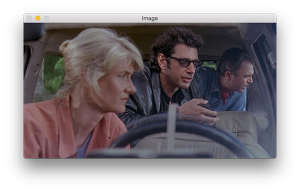

In [11]:
resized = imutils.resize(image, width=300)
cv2_imshow(resized)

# 이미지 회전
이제 이미지를 회전시키는 방법에 대해서 알아보겠습니다.

먼저 시계 방향으로 45도 만큼 회전시켜보겠습니다. 

이미지 중심을 계산 한 다음 회전 행렬을 구성하고 마지막으로 아핀 변환을 적용시킬겁니다.

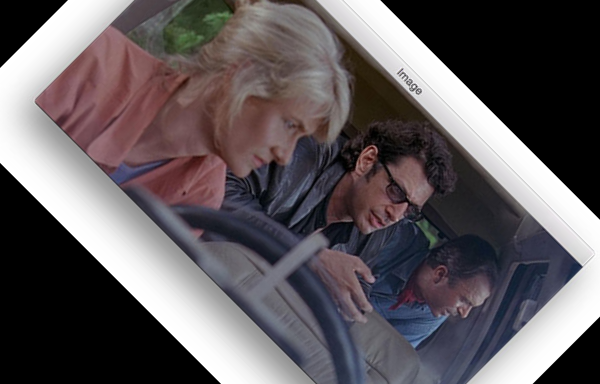

In [13]:
center = (w // 2, h //2)
M = cv2.getRotationMatrix2D(center, -45, 1.0)
rotated = cv2.warpAffine(image, M, (w, h))
cv2_imshow(rotated)

중심점을 기준으로 이미지를 회전하려면 먼저 이미지의 중심 (x, y) 좌표를 계산해야합니다 .

참고 : //를 사용하여 정수 계산을 수행합니다 (즉, 부동 소수점 값 없음).

여기에서 회전 행렬 M을 계산합니다. -45는 이미지를 시계 방향으로 45도 회전한다는 의미입니다. 중 / 고등학교 기하학 수업에서 단위 원에 대해 상기하면 양의 각도는 반 시계 방향이고 음의 각도는 시계 방향임을 상기시킬 수 있습니다.

이제 imutils를 사용하여 단 한 줄의 코드로 동일한 작업을 수행해 보겠습니다.

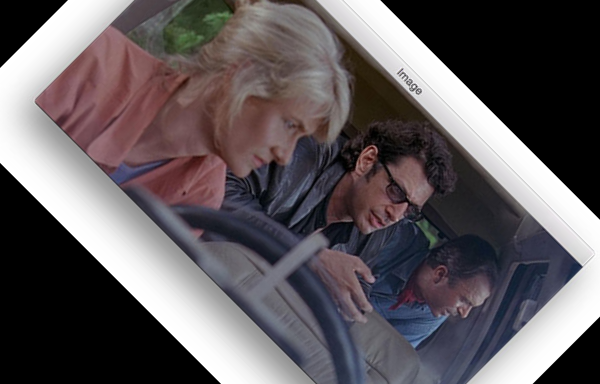

In [14]:
rotated = imutils.rotate(image,-45)
cv2_imshow(rotated)

왜 회전 후 이미지가 잘리나요?
문제는 OpenCV는 회전 후 이미지가 잘리고 보이지 않는 경우를 신경 쓰지 않습니다. 여기에 전체 이미지를 계속 볼 수있는 imutils 버전이 있습니다. 이것이 어떻게 작동하는지 궁금하다면 [여기](https://www.pyimagesearch.com/2017/01/02/rotate-images-correctly-with-opencv-and-python/)를 참조하시기 바랍니다.

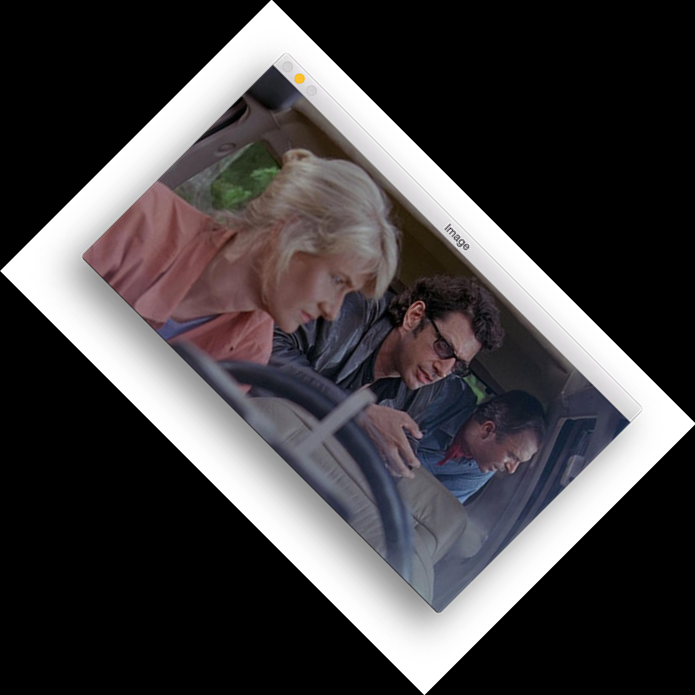

In [15]:
rotated = imutils.rotate_bound(image,45)
cv2_imshow(rotated)

# 이미지 다듬기
많은 이미지 처리 파이프 라인에서 고주파 노이즈를 줄이려면 이미지를 흐리게 처리해야합니다. 이렇게 하면 우리의 알고리즘이 이미지 내 사물을 발견하고 이해하는 것을 더 쉽게할 수 있어 노이즈가 알고리즘을 혼란스럽게 하는 것을 막아줍니다. OpenCV에서는 이미지를 흐리게 처리하는 것이 매우 쉽고 여러 가지 방법으로 이미지를 얻을 수 있습니다.

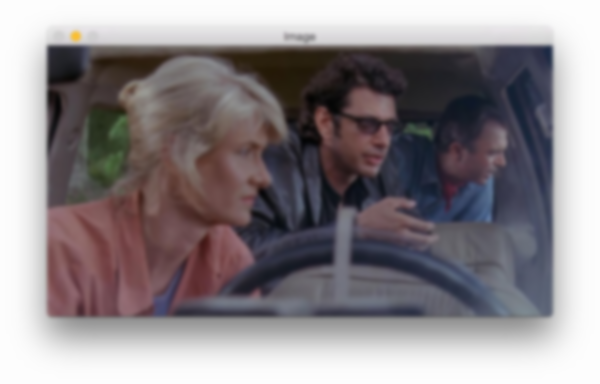

In [16]:
# GaussianBlur 함수 11 x 11 kernel
# 커널이 클수록 이미지가 더 흐려집니다. 커널이 작을수록 흐릿한 이미지가 줄어 듭니다.
blurred = cv2.GaussianBlur(image, (11, 11), 0)
cv2_imshow(blurred)

# 이미지에 그리기
이 섹션에서는 입력 이미지에 직사각형, 원 및 선을 그릴 것입니다. 이미지에 텍스트도덮어씌울겁니다.

OpenCV를 사용하여 이미지에 그리기로 넘어 가기 전에 이미지에 대한 그리기 작업은 in-place로 수행된다는 것을 명심하기 바랍니다. 따라서 각 코드 블록의 시작 부분에서 복사본을 저장하는 원본 이미지의 복사본을 출력으로 만듭니다. 그런 다음 output in-place 이미지를 그려 원본 이미지를 손상시키지 않습니다.

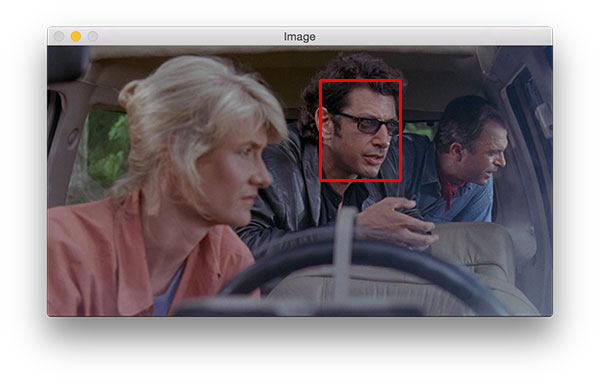

In [35]:
output = image.copy()
cv2.rectangle(output, (320, 80), (400, 180), (0,0,255), 2)
cv2_imshow(output)

img : 그릴 대상 이미지.

pt1 : 왼쪽 위의 시작 픽셀 좌표입니다. 이 경우 왼쪽 상단은 (320, 80)입니다.

pt2 : 끝 픽셀 — 오른쪽 아래. 오른쪽 아래 픽셀은 (400, 180)에 있습니다.

색상 : BGR 튜플. 빨간색을 나타 내기 위해 (0, 0, 255)을 제공했습니다.

두께 : 선 두께 (음수 값은 단색 사각형을 만듭니다). 두께 2를 제공했습니다.

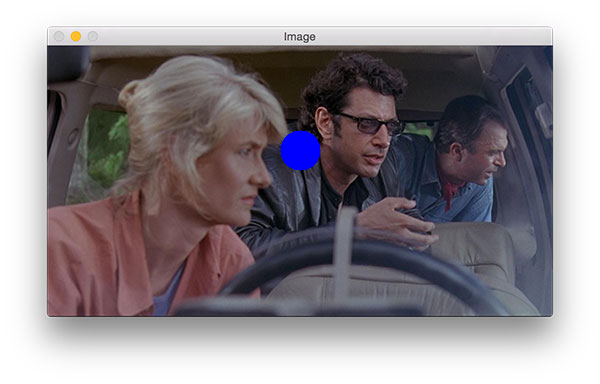

In [36]:
# 원형 그리기
output = image.copy()
cv2.circle(output, (300, 150), 20, (255, 0, 0), -1)
cv2_imshow(output)

img : 출력 이미지입니다.

center : 원의 중심 좌표입니다. 엘리의 눈앞에 (300, 150)을 공급했습니다.

radius : 원 반경을 픽셀 단위로 나타냅니다. 20 픽셀의 값을 제공했습니다.

색상 : 원 색상. 이번에는 B로 255, BGR 튜플의 G + R 구성 요소 (255, 0, 0)로 표시된 파란색으로갔습니다.

두께 : 선 두께. 음수 값 (-1)을 입력 했으므로 원이 채워집니다.

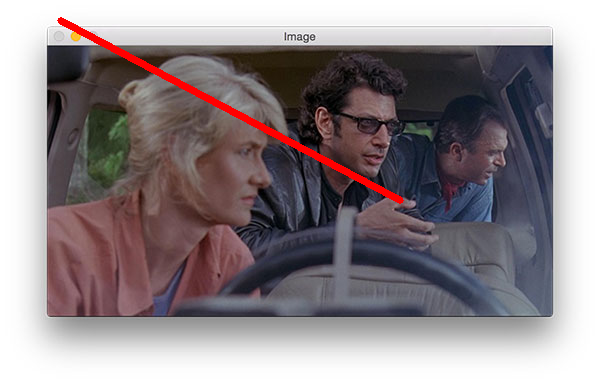

In [39]:
# 선 그리기
output = image.copy()
cv2.line(output, (60,20), (400, 200), (0,0,255), 5)
cv2_imshow(output)

종종 표시 목적으로 이미지에 텍스트를 곂치려는 경우가 있습니다. 얼굴 인식을하고 있다면 얼굴 위에 사람의 이름을 그려야 할 것입니다. 또는 컴퓨터 비전 작업을 발전 시키면 이미지 분류기 또는 물체 탐지기를 구축 할 수 있습니다. 이 경우 클래스 이름과 확률이 포함 된 텍스트를 그리려고 할 것입니다.

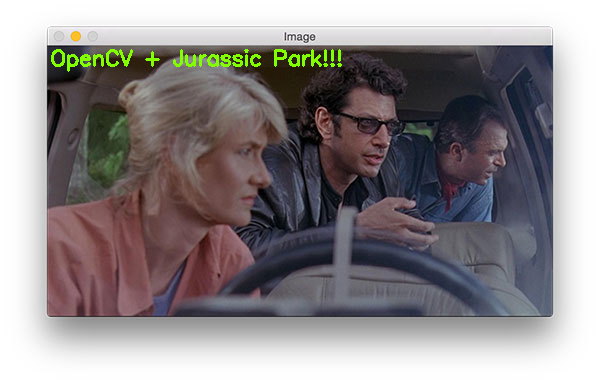

In [44]:
output = image.copy()
cv2.putText(output, "OpenCV + Jurassic Park!!!", (50, 65),
           cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 130), 2)
cv2_imshow(output)

필요한 파라미터는 다음과 같습니다.

img : 출력 이미지입니다.

text : 이미지에 쓰거나 그릴 텍스트 문자열입니다.

pt : 텍스트의 시작점.

글꼴 : 사용 가능한 글꼴이 여기에 나열됩니다.

scale : 글꼴 크기 비.

color : 텍스트 색상.

thickness : 획의 두께 (픽셀)입니다.

# 객체 카운트
다음 이미지에서 간단한 Python + OpenCV 스크립트를 사용하여 테트리스 블록 수를 계산하는 방법을 알아 봅니다.

이번에 배워볼 것은:
1. OpenCV를 사용하여 이미지를 그레이 스케일로 변환하는 방법 학습
2. 에지 감지 수행
3. 회색조 이미지의 임계 값
4. 윤곽선 찾기, 계산 및 그리기
5. erosion과 dilation 수행
6. 이미지 마스킹

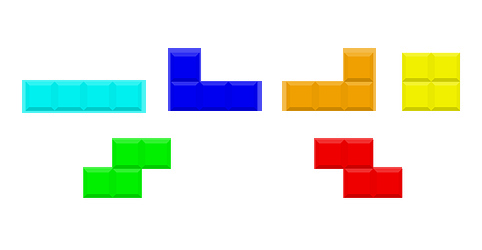

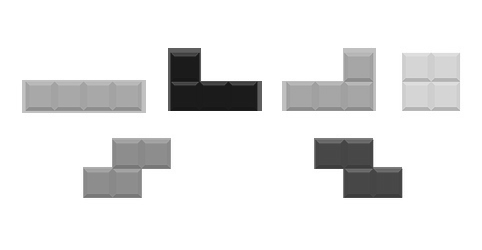

In [53]:
image = cv2.imread("tetris_blocks.png")
cv2_imshow(image)

# 회색조로 변경
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

# 가장자리 탐색
가장자리 감지는 이미지에서 객체의 경계를 찾는 데 유용하며, 분할을 할 때 효과적입니다.

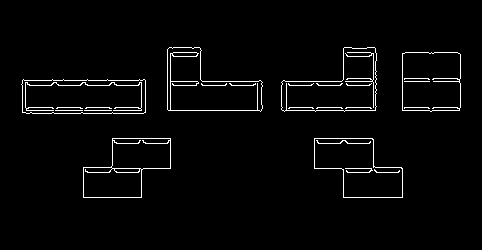

In [54]:
edged = cv2.Canny(gray, 30, 150)
cv2_imshow(edged)

인기있는 Canny 알고리즘 (1986 년 John F. Canny가 개발)을 사용하여 이미지의 가장자리를 찾을 수 있습니다.

우리는 cv2.Canny 함수에 세가지 파라미터를 입력합니다 :

1. img : 회색 이미지.
2. minVal : 최소 임계 값입니다 (이 경우 30).
3. maxVal :이 예에서 최대 임계 값은 150입니다.
4. aperture_size : Sobel 커널 크기. 기본적으로이 값은 3입니다.

다른 최소 및 최대 임계 값은 다른 가장자리 맵을 반환합니다.

# 임계값
이미지 임계 값은 이미지 처리 파이프 라인을 위한 중요한 중간 단계입니다. 임계 값을 사용하면 이미지의 밝거나 어두운 영역과 윤곽을 제거 할 수 있습니다.

임계 값을 실험 해 보는 것이 좋습니다.

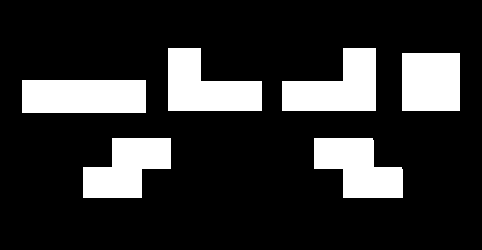

In [55]:
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
cv2_imshow(thresh)

225보다 큰 회색 이미지의 모든 픽셀(이미지의 배경에 해당)을 0 (검정)으로 설정했으며, 이미지의 전경 (즉, 테트리스 자체)에 해당하는 픽셀 골짜기를 225 ~ 255 (흰색) 미만으로 설정하였습니다.

이진 이미지로 배경에서 전경을 분할하는 것은 윤곽선을 찾는 데 중요합니다.

# 윤곽 감지 및 그리기
각 테트리스의 윤곽선을 찾고 외각선을 그려보는 코드를 작성해보겠습니다.

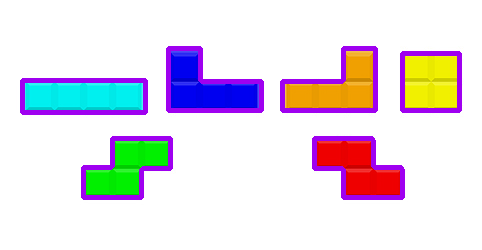

In [57]:
# 임계값 이미지에서 전경의 객체의 외각서을 찾는다.
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
                       cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

for c in cnts:
  # 각각의 윤곽선을 추가하며 그린다.
  cv2.drawContours(output, [c], -1, (240, 0, 159), 3)
cv2_imshow(output)
  

# Erosions and dilations
 Erosions과 dilations은 일반적으로 이진 영상에서 노이즈를 줄이기 위해 사용됩니다 (임계 값의 부작용).

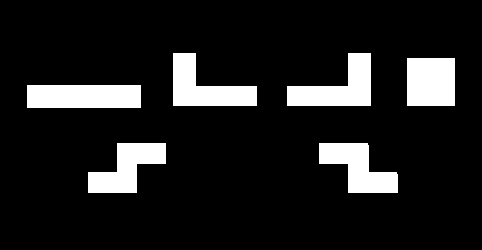

In [58]:
# 전경 객체의 사이즈를 줄이기 위해 erosion을 적용한다.
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations=5)
cv2_imshow(mask)

OpenCV를 사용하면 윤곽을 erode하여 효과적으로 작게 만들거나 충분한 반복으로 완전히 사라지게 할 수 있습니다. 이것은 일반적으로 마스킹 이미지에서 작은 얼룩을 제거하는 데 유용합니다.

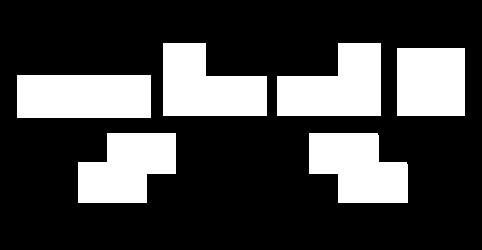

In [60]:
# 마찬가지로 전경 객체의 크기를 크게도 만들 수 있습니다.
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=5)
cv2_imshow(mask)

# 이미지 처리 파이프 라인에서 주변 윤곽을 연결해야하는 경우 
# 이미지에 dilate를 적용 할 수 있습니다. 

# 마스킹 및 비트 단위 연산
마스크를 사용하면 관심 없는 이미지 영역을“마스크 아웃”할 수 있습니다. 우리가 신경 쓰지 않는 이미지 영역을 숨기므로“마스크”라고합니다.

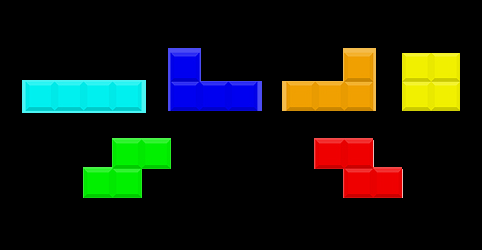

In [62]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(output)

# 배경은 이제 검은 색이고 전경은 컬러 픽셀로 구성되어 있습니다.

오늘의 튜토리얼에서는 Python 프로그래밍 언어를 사용하여 이미지 처리 및 OpenCV의 기본 사항을 배웠습니다.

이제 이러한 이미지 처리 작업을 "빌딩 블록"으로 사용하여 실제 컴퓨터 비전 응용 프로그램을 구축하기 위해 함께 연결할 수 있습니다. 이러한 프로젝트의 좋은 예는 윤곽을 세어 만드는 개체 카운터입니다.

이 튜토리얼이 OpenCV를 배우는 데 도움이 되었기를 바랍니다.